In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
import sklearn.metrics as skm


#### REading dataset

In [3]:
data=pd.read_csv('NLP DATASET.csv',error_bad_lines=False)
data.head()


b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

#### code to check all the missing values in my dataset (Data cleaning)

In [5]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [6]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

password    0
strength    0
dtype: int64

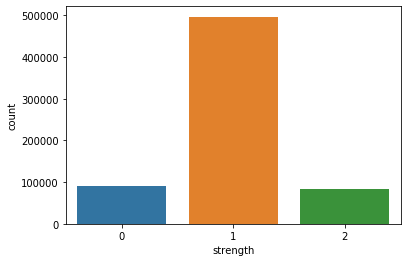

In [9]:
sns.countplot(data['strength'])

In [10]:
password_tuple=np.array(data)

In [11]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

#### shuffling randomly for robustness and to avoid data imbalance

In [12]:
import random
random.shuffle(password_tuple)

In [13]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]


In [14]:
x

['kzde5577',
 'kzde5577',
 'visi7k1yr',
 'visi7k1yr',
 'lamborghin1',
 'visi7k1yr',
 'kzde5577',
 'v1118714',
 'u6c8vhow',
 'visi7k1yr',
 'kino3434',
 'kzde5577',
 'lamborghin1',
 'as326159',
 'lamborghin1',
 'u6c8vhow',
 'AVYq1lDE4MgAZfNt',
 'kino3434',
 'jerusalem393',
 'as326159',
 '52558000aaa',
 'visi7k1yr',
 'AVYq1lDE4MgAZfNt',
 'asv5o9yu',
 'klara-tershina3H',
 '6975038lp',
 'jerusalem393',
 'WUt9IZzE0OQ7PkNE',
 'czuodhj972',
 'jerusalem393',
 'as326159',
 'visi7k1yr',
 'asv5o9yu',
 'WUt9IZzE0OQ7PkNE',
 'AVYq1lDE4MgAZfNt',
 'prisonbreak1',
 'schalke04',
 'klara-tershina3H',
 'fk9qi21m',
 'schalke04',
 'kino3434',
 'universe2908',
 'prisonbreak1',
 'intel1',
 'kswa2mrv',
 'AVYq1lDE4MgAZfNt',
 '612035180tok',
 'faranumar91',
 'fahad123',
 'cigicigi123',
 'juliel009',
 '0169395484a',
 'prisonbreak1',
 '6975038lp',
 'kino3434',
 'AVYq1lDE4MgAZfNt',
 'lsdlsd1',
 'WUt9IZzE0OQ7PkNE',
 'g067057895',
 'juliel009',
 'c3h8bkzr',
 'gaymaids1',
 'kswa2mrv',
 'yk530mg8',
 'khmer100.03278&?><M

#### create a custom function to split input into characters of list

In [15]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [16]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

#### import TF-IDF vectorizer to convert String data into numerical data

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

#### apply TF-IDF vectorizer on data

In [19]:
X=vectorizer.fit_transform(x)

In [47]:
print(X.shape[1])

129


In [46]:
vectorizer.get_feature_names()

['\x04',
 '\x05',
 '\x06',
 '\x08',
 '\x0e',
 '\x0f',
 '\x10',
 '\x11',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '¡',
 '¦',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '»',
 '¼',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'é',
 'ê',
 'í',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 '—',
 '‚',
 '™']

In [22]:
first_document_vector=X[0]
first_document_vector

<1x129 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [23]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56701387],
        [0.        ],
        [0.59142939],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [24]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False).astype(str).head(20)

,TF-IDF
7,0.5914293898242222
5,0.5670138706885285
z,0.33548114554324376
k,0.29229979935629863
d,0.28581408720606105
e,0.22142737666058276
t,0.0
³,0.0
°,0.0
±,0.0


#### split data into train & test
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

In [27]:
y_train

[1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,


##### MLP 

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier((300,),activation='relu',verbose=1,
                  solver='adam',batch_size=32,learning_rate='constant',learning_rate_init=0.001,max_iter=20)
mlp=mlp.fit(X_train,y_train)

Iteration 1, loss = 0.37186522
Iteration 2, loss = 0.26792794
Iteration 3, loss = 0.19535225
Iteration 4, loss = 0.15078579


In [ ]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [ ]:
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("MLP: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("MLP: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

#### Classification report

In [ ]:
from yellowbrick.classifier import *
visualize=ClassificationReport(mlp)
visualize.fit(X_train,y_train)
visualize.score(X_test,y_test)
visualize.show(clear_figure=True)

#### ROC AUC

In [ ]:
roc_graph_MLP=ROCAUC(mlp,classes=[0,1,2])
roc_graph_MLP.fit(X_train,y_train)
roc_graph_MLP.score(X_test,y_test)
roc_graph_MLP.show()

#### FEATURE SCALING (REQUIRED FOR ANN)

In [29]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler(with_mean=False)
X_train_ann=sc.fit_transform(X_train)
X_test_ann=sc.transform(X_test)

#### ANN

In [56]:
import tensorflow as tf
ann=tf.keras.models.Sequential()
input_dim = X_train.shape[1]

#### HIDDEN LAYERS WITH 6 NEURONS EACH

In [57]:
ann.add(tf.keras.layers.Dense(units=6, input_dim=input_dim,activation='relu'))

In [63]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))


In [61]:
ann.add(tf.keras.layers.Dense(units=3,activation=tf.keras.activations.softmax))

##### COMPILE AND RUN THE MODEL

In [62]:
ann.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy,metrics =['accuracy'])

ValueError: Received uninstantiated Loss class: <class 'tensorflow.python.keras.losses.SparseCategoricalCrossentropy'>
Please call loss ""classes before passing them to Model.compile.

In [54]:
ann.fit(X_train,X_test)

ValueError: A SciPy sparse matrix was passed to a model that expects dense inputs. Please densify your inputs first, such as by calling `x.toarray().

#### Apply Logistic on data as use-cas is Classification

## ML ALGO

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression(random_state=0,multi_class='multinomial',n_jobs=5)

In [ ]:
clf.fit(X_train,y_train)

#### doing prediction for specific custom data

In [ ]:
dt=np.array(['%@123abcd'])
pred=vectorizer.transform(dt)
clf.predict(pred)

#### doing prediction on X-Test data

In [ ]:
y_pred=clf.predict(X_test)
y_pred

#### check Accuracy of your model using confusion_matrix,accuracy_score

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("The accuracy is =",accuracy_score(y_test,y_pred))

##### classification report

In [ ]:
from sklearn.metrics import classification_report
from yellowbrick.classifier import *
visualize=ClassificationReport(clf)
visualize.fit(X_train,y_train)
visualize.score(X_test,y_test)
visualize.show(clear_figure=True)    


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5,random_state=2)
forest.fit(X_train, y_train)

y_pred=forest.predict(X_test)
y_pred

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model

# fit the model 
forest.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))


In [ ]:
from yellowbrick.classifier import *
visualize=ClassificationReport(forest)
visualize.fit(X_train,y_train)
visualize.score(X_test,y_test)
visualize.show(clear_figure=True)

## Decision tree

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

In [ ]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

### Precision recall f-measure

In [ ]:
from yellowbrick.classifier import *
visualize=ClassificationReport(tree)
visualize.fit(X_train,y_train)
visualize.score(X_test,y_test)
visualize.show(clear_figure=True)

## XGBOOST

In [ ]:
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

In [ ]:

#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

### precision recall f1 measure

In [ ]:
from yellowbrick.classifier import *
visualize=ClassificationReport(xgb)
visualize.fit(X_train,y_train)
visualize.score(X_test,y_test)
visualize.show(clear_figure=True)

### ROC-AUC CURVE


In [ ]:
from sklearn.metrics import (
    roc_auc_score,
    plot_roc_curve,
)
from yellowbrick.classifier import ROCAUC

### roc graph

In [ ]:
roc_graph_linear=ROCAUC(clf,classes=[0,1,2])
roc_graph_linear.fit(X_train,y_train)
roc_graph_linear.score(X_test,y_test)
roc_graph_linear.show()

In [ ]:
roc_graph_dt=ROCAUC(tree,classes=[0,1,2])
roc_graph_dt.fit(X_train,y_train)
roc_graph_dt.score(X_test,y_test)
roc_graph_dt.show()

In [ ]:
roc_graph_xgb=ROCAUC(xgb,classes=[0,1,2])
roc_graph_xgb.fit(X_train,y_train)
roc_graph_xgb.score(X_test,y_test)
roc_graph_xgb.show()

In [ ]:
""""autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)